In [1]:
import numpy as np
import matplotlib.pyplot as plt
from package import noise_spectra

# Noise profiles $S(\omega)$

Given the frequency response, $S(\omega)$ of the noise source, and filter function, $F_N(\omega,t)$, we will compute the coherence profile, $C(t)$. This serves as a primer on how to specify a noise profile, and add new ones. Each noise profile has a specific function defining it in `noise_spectra`. Below, you can see each individual implementation. Additionally, `noise_spectrum_combination` allows for combinations of the other defined noise profiles (e.g. 2 1/f noise profiles with different decay constants, $\alpha_1$ and $\alpha_2$). `noise_spectrum_combination` inputs parameters as dictionaries specifying the parameters for each noise type. The values of these dictionaries should be lists, the length of which corresponds to how many of that noise type to include in the summation. Passing empty lists, or an empty dictionary indicates that no noise of that type is present in the summation of noises.

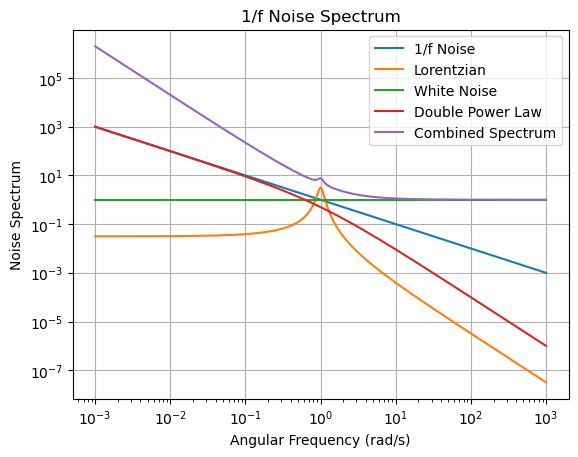

In [ ]:
omega = np.logspace(-3, 3, 1000)  # Example angular frequencies

plt.plot(omega, noise_spectra.noise_spectrum_1f(omega, A = 1.0, alpha = 1.0), label='1/f Noise')
plt.plot(omega, noise_spectra.noise_spectrum_lor(omega, omega_0=1.0, gamma=0.1, A=1.0), label='Lorentzian')
plt.plot(omega, noise_spectra.noise_spectrum_white(omega, C=1.0), label='White Noise')
plt.plot(omega, noise_spectra.noise_spectrum_double_power_law(omega, A=1.0, alpha=1.0, beta=2.0, gamma=1.0), label='Double Power Law')
# For noise_spectrum_combination, we can feed lists of parameters to combine multiple spectra together.
#  In the example below, we sum together two 1/f spectra, one Lorentzian, one white noise, and one double power law for the combined noise spectrum.
plt.plot(omega, noise_spectra.noise_spectrum_combination(omega,
    f_params={"alpha": [1.0,2.0], "A": [1.0,2.0]},
    lor_params={"omega_0": [1.0], "gamma": [0.1], "A": [1.0]},
    white_params={"C": [1.0]},
    double_power_law_params={"A": [1.0], "alpha": [1.0], "beta": [2.0], "gamma": [1.0]}), label='Combined Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Noise Spectrum')
plt.title('Noise Spectrum')
plt.grid(True)
plt.legend()
plt.show()